In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
df_location = '/content/drive/MyDrive/Weather/41.9N_12.46E.csv'
# df_location = '/content/drive/MyDrive/Weather/18N_283.2E.csv'
# df_location = '/content/drive/MyDrive/Weather/58.76N_265.83E.csv'
df = pd.read_csv(df_location)
df.columns = ['year', 'month', 'day', 'hour', 'temperature', 'precipitation', 'u-wind', 'v-wind']
df.temperature = df.temperature -273.15

In [ ]:
df.head(5)

,year,month,day,hour,temperature,precipitation,u-wind,v-wind
0,1980,1,1,1,-19.31,0.000002,4.4804,-7.6376
1,1980,1,1,2,-20.31,0.000003,4.4758,-7.8804
2,1980,1,1,3,-21.16,0.000002,4.4449,-8.2900
3,1980,1,1,4,-21.35,0.000002,4.3848,-8.6249
4,1980,1,1,5,-21.81,0.000002,4.3894,-8.6752


In [ ]:
temperature = df.temperature


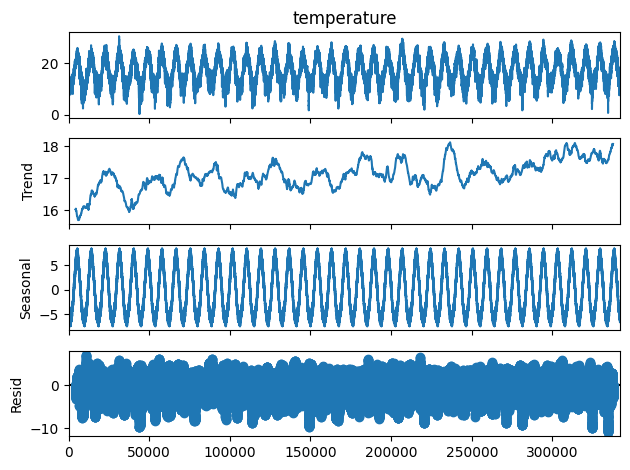

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

temperature = df['temperature']

result_yearly = seasonal_decompose(temperature, model='additive', period=8760)
result_yearly.plot()
plt.show()



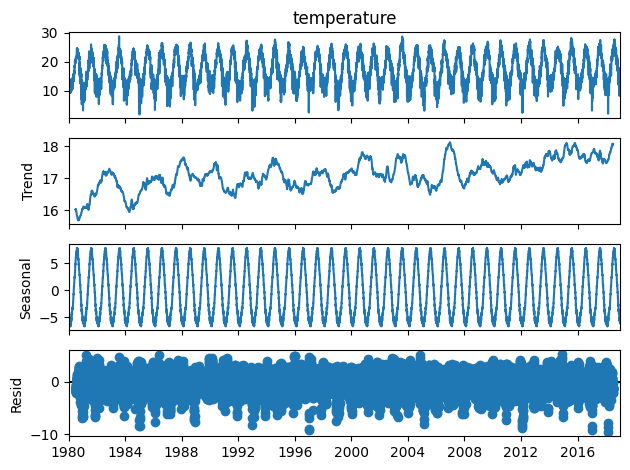

ADF Statistic: -9.990720
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Strong evidence against the null hypothesis (Ho), reject the null hypothesis. Data has no unit root and is stationary.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

import pandas as pd

df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])

df.set_index('datetime', inplace=True)

temperature = df['temperature']

temperature_daily = temperature.resample('D').mean()

result_daily = seasonal_decompose(temperature_daily, model='additive', period=365)  # assuming 365 days per year
result_daily.plot()
plt.show()

# Augmented Dickey-Fuller test
adf_result = adfuller(temperature_daily.dropna())
print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])
print('Critical Values:')
for key, value in adf_result[4].items():
    print('\t%s: %.3f' % (key, value))

if adf_result[1] < 0.05:
    print("Strong evidence against the null hypothesis (Ho), reject the null hypothesis. Data has no unit root and is stationary.")
else:
    print("Weak evidence against the null hypothesis, time series has a unit root, indicating it is non-stationary and may have a trend.")


In [1]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

temperature_daily = temperature.resample('D').mean()

decomposition = seasonal_decompose(temperature_daily, model='additive', period=365)

decomposition.plot()
plt.show()

trend = decomposition.trend.dropna()

# ADF Test
adf_result = adfuller(trend)
print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])
print('Critical Values:')
for key, value in adf_result[4].items():
    print('\t%s: %.3f' % (key, value))

if adf_result[1] < 0.05:
    print("Strong evidence against the null hypothesis (Ho), reject the null hypothesis. Data has no unit root and is stationary.")
else:
    print("Weak evidence against the null hypothesis, time series has a unit root, indicating it is non-stationary and may have a trend.")


NameError: name 'temperature' is not defined

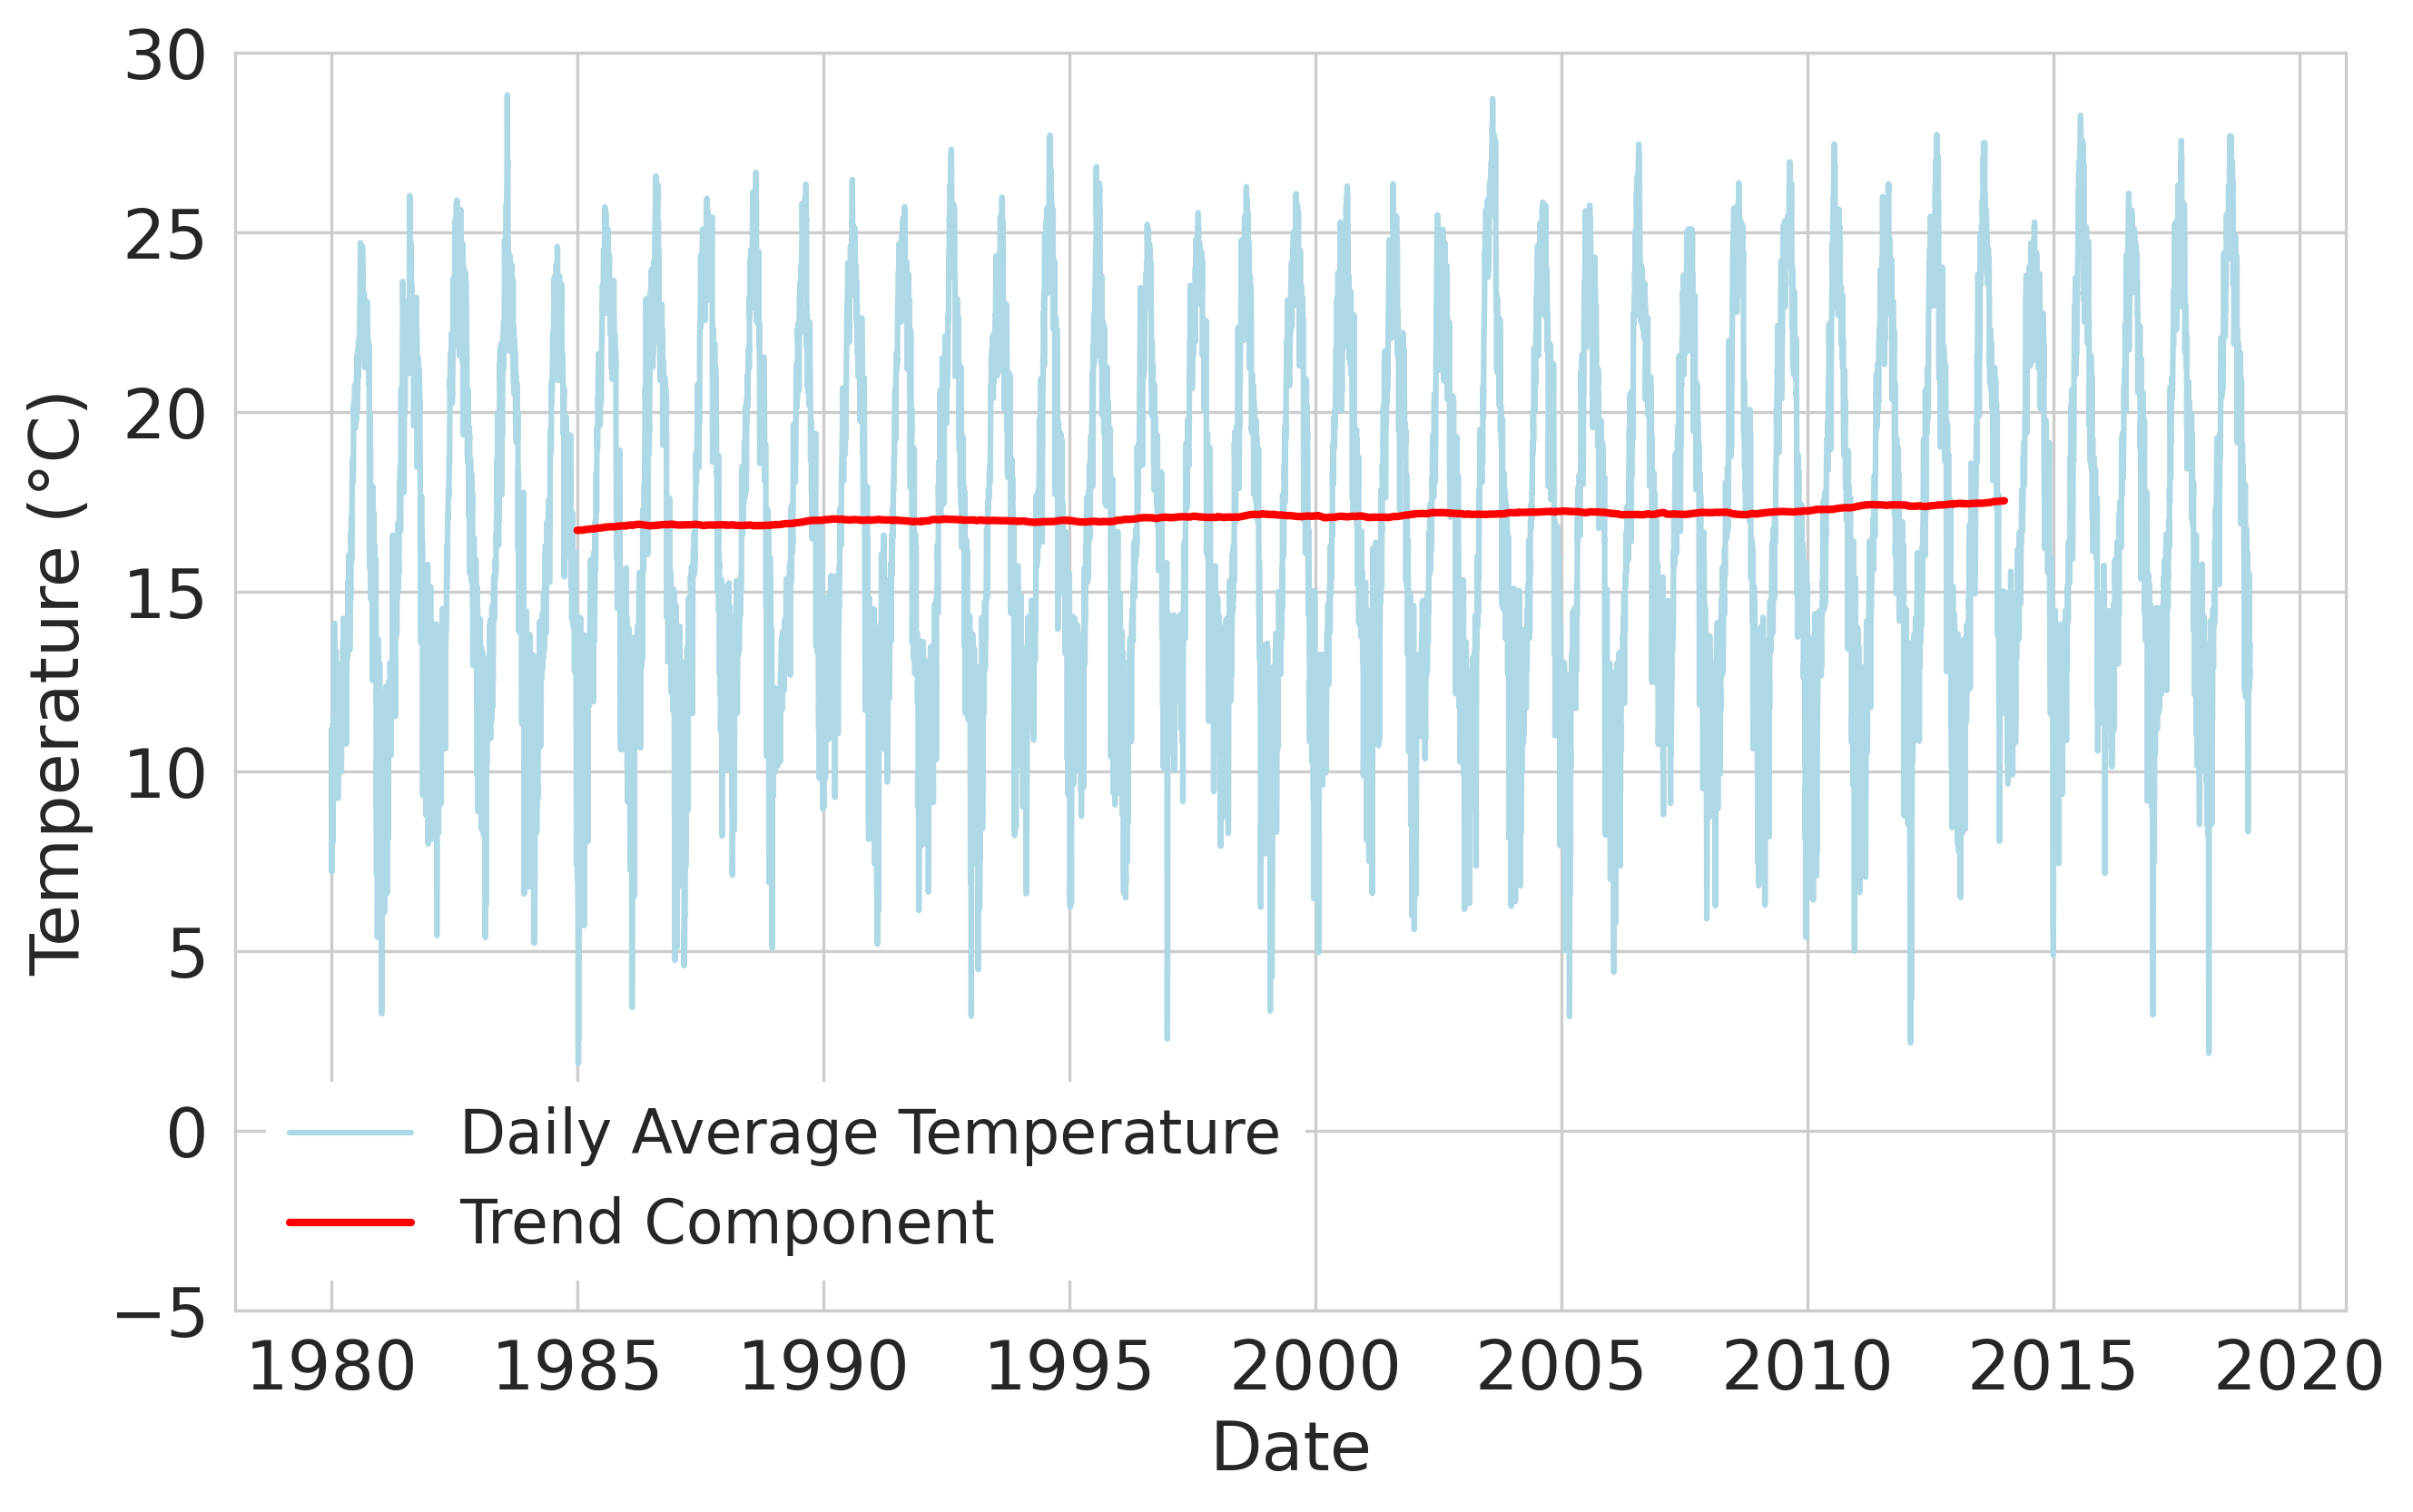

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
df.set_index('datetime', inplace=True)
temperature = df['temperature']

temperature_daily = temperature.resample('D').mean()

decomposition = seasonal_decompose(temperature_daily, model='additive', period=365)
trend = decomposition.trend
# Plotting
# plt.figure(figsize=(14, 7))  # Set the figure size for better visibility
# plt.plot(temperature_daily, label='Daily Average Temperature', color='lightblue')
# plt.plot(trend, label='Trend Component', color='red', linewidth=2)
# # plt.title('Daily Average Temperature and Trend Component')
# plt.xlabel('Date')
# plt.ylabel('Temperature (°C)')
# plt.legend()
# plt.grid(True)
# plt.show()

import seaborn as sns
sns.set_style("whitegrid")
fig = plt.figure(figsize=(10, 6), dpi=300)
plt.plot(temperature_daily, label='Daily Average Temperature', color='lightblue')
plt.plot(trend, label='Trend Component', color='red', linewidth=2)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Temperature (°C)', fontsize=18)
plt.legend(frameon=True, framealpha=1, edgecolor='none', fontsize=16)
plt.grid(True)
plt.ylim([-5, 30])
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()
# plt.xticks([0, 24, 48, 72, 96, 120, 144, 168])
# plt.yticks([-6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16])
# plt.xlim([0,168])

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming 'df' is your DataFrame with columns for ['year', 'month', 'day', 'hour', 'temperature']
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
df.set_index('datetime', inplace=True)
temperature = df['temperature']

# Resample the temperature data to daily averages
temperature_daily = temperature.resample('D').mean()

# Perform seasonal decomposition on the daily data
decomposition = seasonal_decompose(temperature_daily, model='additive', period=365)
trend = decomposition.trend  # Extract the trend component

# Plotting
# plt.figure(figsize=(14, 7))  # Set the figure size for better visibility
# plt.plot(temperature_daily, label='Daily Average Temperature', color='lightblue')
# plt.plot(trend, label='Trend Component', color='red', linewidth=2)
# # plt.title('Daily Average Temperature and Trend Component')
# plt.xlabel('Date')
# plt.ylabel('Temperature (°C)')
# plt.legend()
# plt.grid(True)
# plt.show()

import seaborn as sns
sns.set_style("whitegrid")
fig = plt.figure(figsize=(10, 6), dpi=300)
plt.plot(temperature_daily, label='Daily Average Temperature', color='lightblue')
plt.plot(trend, label='Trend Component', color='red', linewidth=2)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Temperature (°C)', fontsize=18)
plt.legend(frameon=True, framealpha=1, edgecolor='none', fontsize=16)
plt.grid(True)
plt.ylim([-5, 30])
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()
# plt.xticks([0, 24, 48, 72, 96, 120, 144, 168])
# plt.yticks([-6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16])
# plt.xlim([0,168])

In [ ]:
df['date'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
df['wind'] = (df['u-wind']**2 + df['v-wind']**2)**0.5
# Constants for transformations
hours_in_day = 24
days_in_month = 30  #approdf
months_in_year = 12

# Add cyclical hour features
df['hour_sin'] = np.sin(2 * np.pi * df['date'].dt.hour / hours_in_day)

# Add cyclical day features
df['day_sin'] = np.sin(2 * np.pi * df['date'].dt.day / days_in_month)

# Add cyclical month features
df['month_sin'] = np.sin(2 * np.pi * df['date'].dt.month / months_in_year)

columns_to_drop = ['month','day','hour']
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns], axis=1)
df

,year,temperature,precipitation,u-wind,v-wind,date,wind,hour_sin,day_sin,month_sin
0,1980,10.92,1.771900e-05,5.0144,-8.4435,1980-01-01 01:00:00,9.820229,0.258819,0.207912,5.000000e-01
1,1980,11.01,1.958600e-05,4.9712,-7.7456,1980-01-01 02:00:00,9.203649,0.500000,0.207912,5.000000e-01
2,1980,11.05,9.337800e-07,4.5916,-7.5101,1980-01-01 03:00:00,8.802522,0.707107,0.207912,5.000000e-01
3,1980,10.99,1.958600e-05,4.4404,-7.1360,1980-01-01 04:00:00,8.404740,0.866025,0.207912,5.000000e-01
4,1980,10.93,5.875300e-05,4.6318,-6.5412,1980-01-01 05:00:00,8.015040,0.965926,0.207912,5.000000e-01
...,...,...,...,...,...,...,...,...,...,...
341874,2018,14.18,0.000000e+00,-1.3146,-3.9372,2018-12-31 19:00:00,4.150869,-0.965926,0.207912,-2.449294e-16
341875,2018,13.80,0.000000e+00,-2.1201,-4.0275,2018-12-31 20:00:00,4.551437,-0.866025,0.207912,-2.449294e-16
341876,2018,13.30,0.000000e+00,-2.7930,-4.4435,2018-12-31 21:00:00,5.248385,-0.707107,0.207912,-2.449294e-16
341877,2018,13.28,0.000000e+00,-3.0675,-5.7936,2018-12-31 22:00:00,6.555559,-0.500000,0.207912,-2.449294e-16


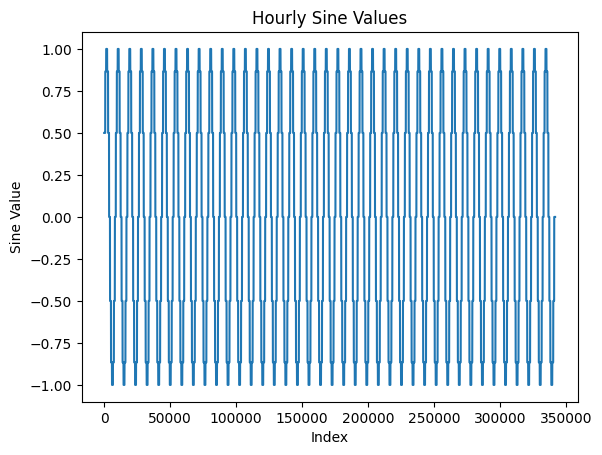

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df['month_sin'],)
plt.title('Hourly Sine Values')
plt.xlabel('Index')
plt.ylabel('Sine Value')
plt.show()


In [ ]:
df.isnull().sum()

year             0
temperature      0
precipitation    0
u-wind           0
v-wind           0
date             0
wind             0
hour_sin         0
day_sin          0
month_sin        0
dtype: int64

In [ ]:
df_filtered = df.tail(4*7 * 24)
train_data = df_filtered.iloc[:-24]
test_data = df_filtered.iloc[-24:]

In [ ]:
training_set = df_filtered['temperature'].values

In [ ]:
def df_to_XY(df,window_size=10):
 X_train=[]
 y_train=[]

 for i in range(10,len(training_set)):
    X_train.append(training_set[i-10:i])
    y_train.append(training_set[i])

 X_train, y_train = np.array(X_train), np.array(y_train)
 return X_train, y_train

WINDOW = 10
X,y = df_to_XY(df_filtered,WINDOW)
print(len(X),len(y))


X_train = X[:-48]
y_train = y[:-48]
X_val = X[-48:-24]
y_val = y[-48:-24]
X_test = X[-24:]
y_test = y[-24:]




662 662


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

regressor = Sequential()

regressor.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=100, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=100))
regressor.add(Dropout(0.2))
regressor.add(Dense(units=1))


optimizer = Adam(learning_rate=0.001)

regressor.compile(optimizer=optimizer, loss='mean_squared_error')


early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


history = regressor.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=16, callbacks=[early_stopping])


KeyboardInterrupt: 

In [ ]:
his = pd.DataFrame(history.history)
his.head()


,loss,val_loss
0,38.112392,0.936374
1,6.363962,0.400665
2,5.910459,0.397742
3,6.249364,0.400956
4,5.984552,0.395139


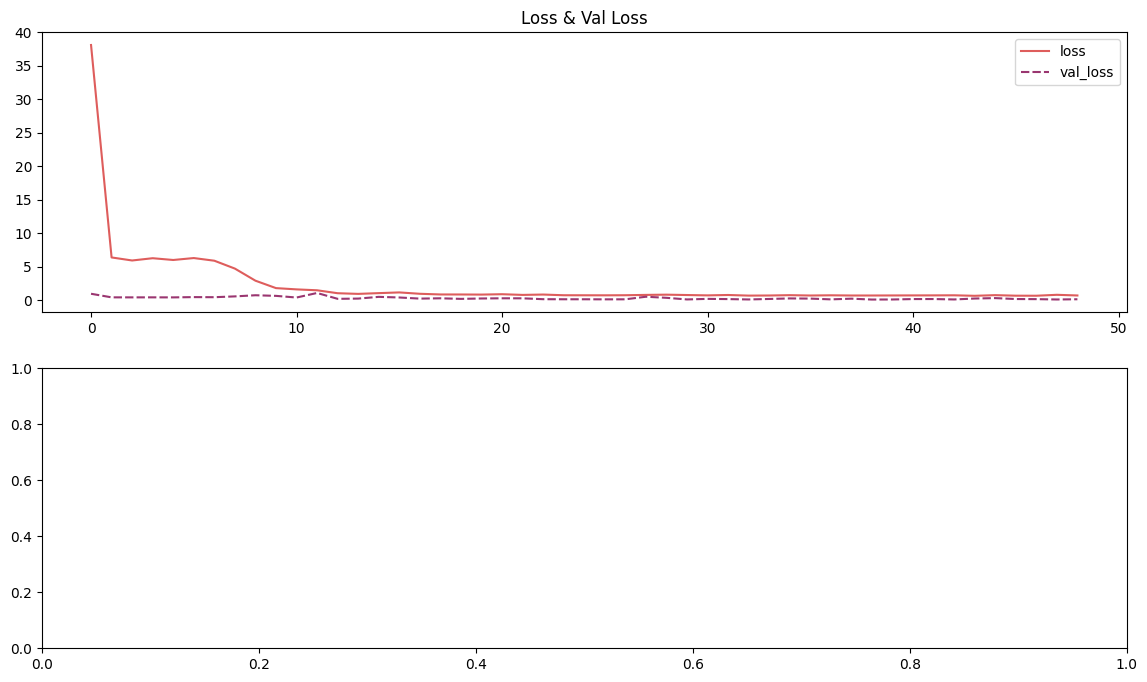

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

his.columns
history_loss = his[['loss', 'val_loss']]


fig,axes = plt.subplots(2,1,figsize=(14,8))
plt.subplot(2,1,1)
plt.title("Loss & Val Loss")
sns.lineplot(history_loss,palette="flare");

In [ ]:
train_pred = regressor.predict(X_train).flatten()
val_pred = regressor.predict(X_val).flatten()
test_pred = regressor.predict(X_test).flatten()

1/1 [==============================] - 0s 24ms/step


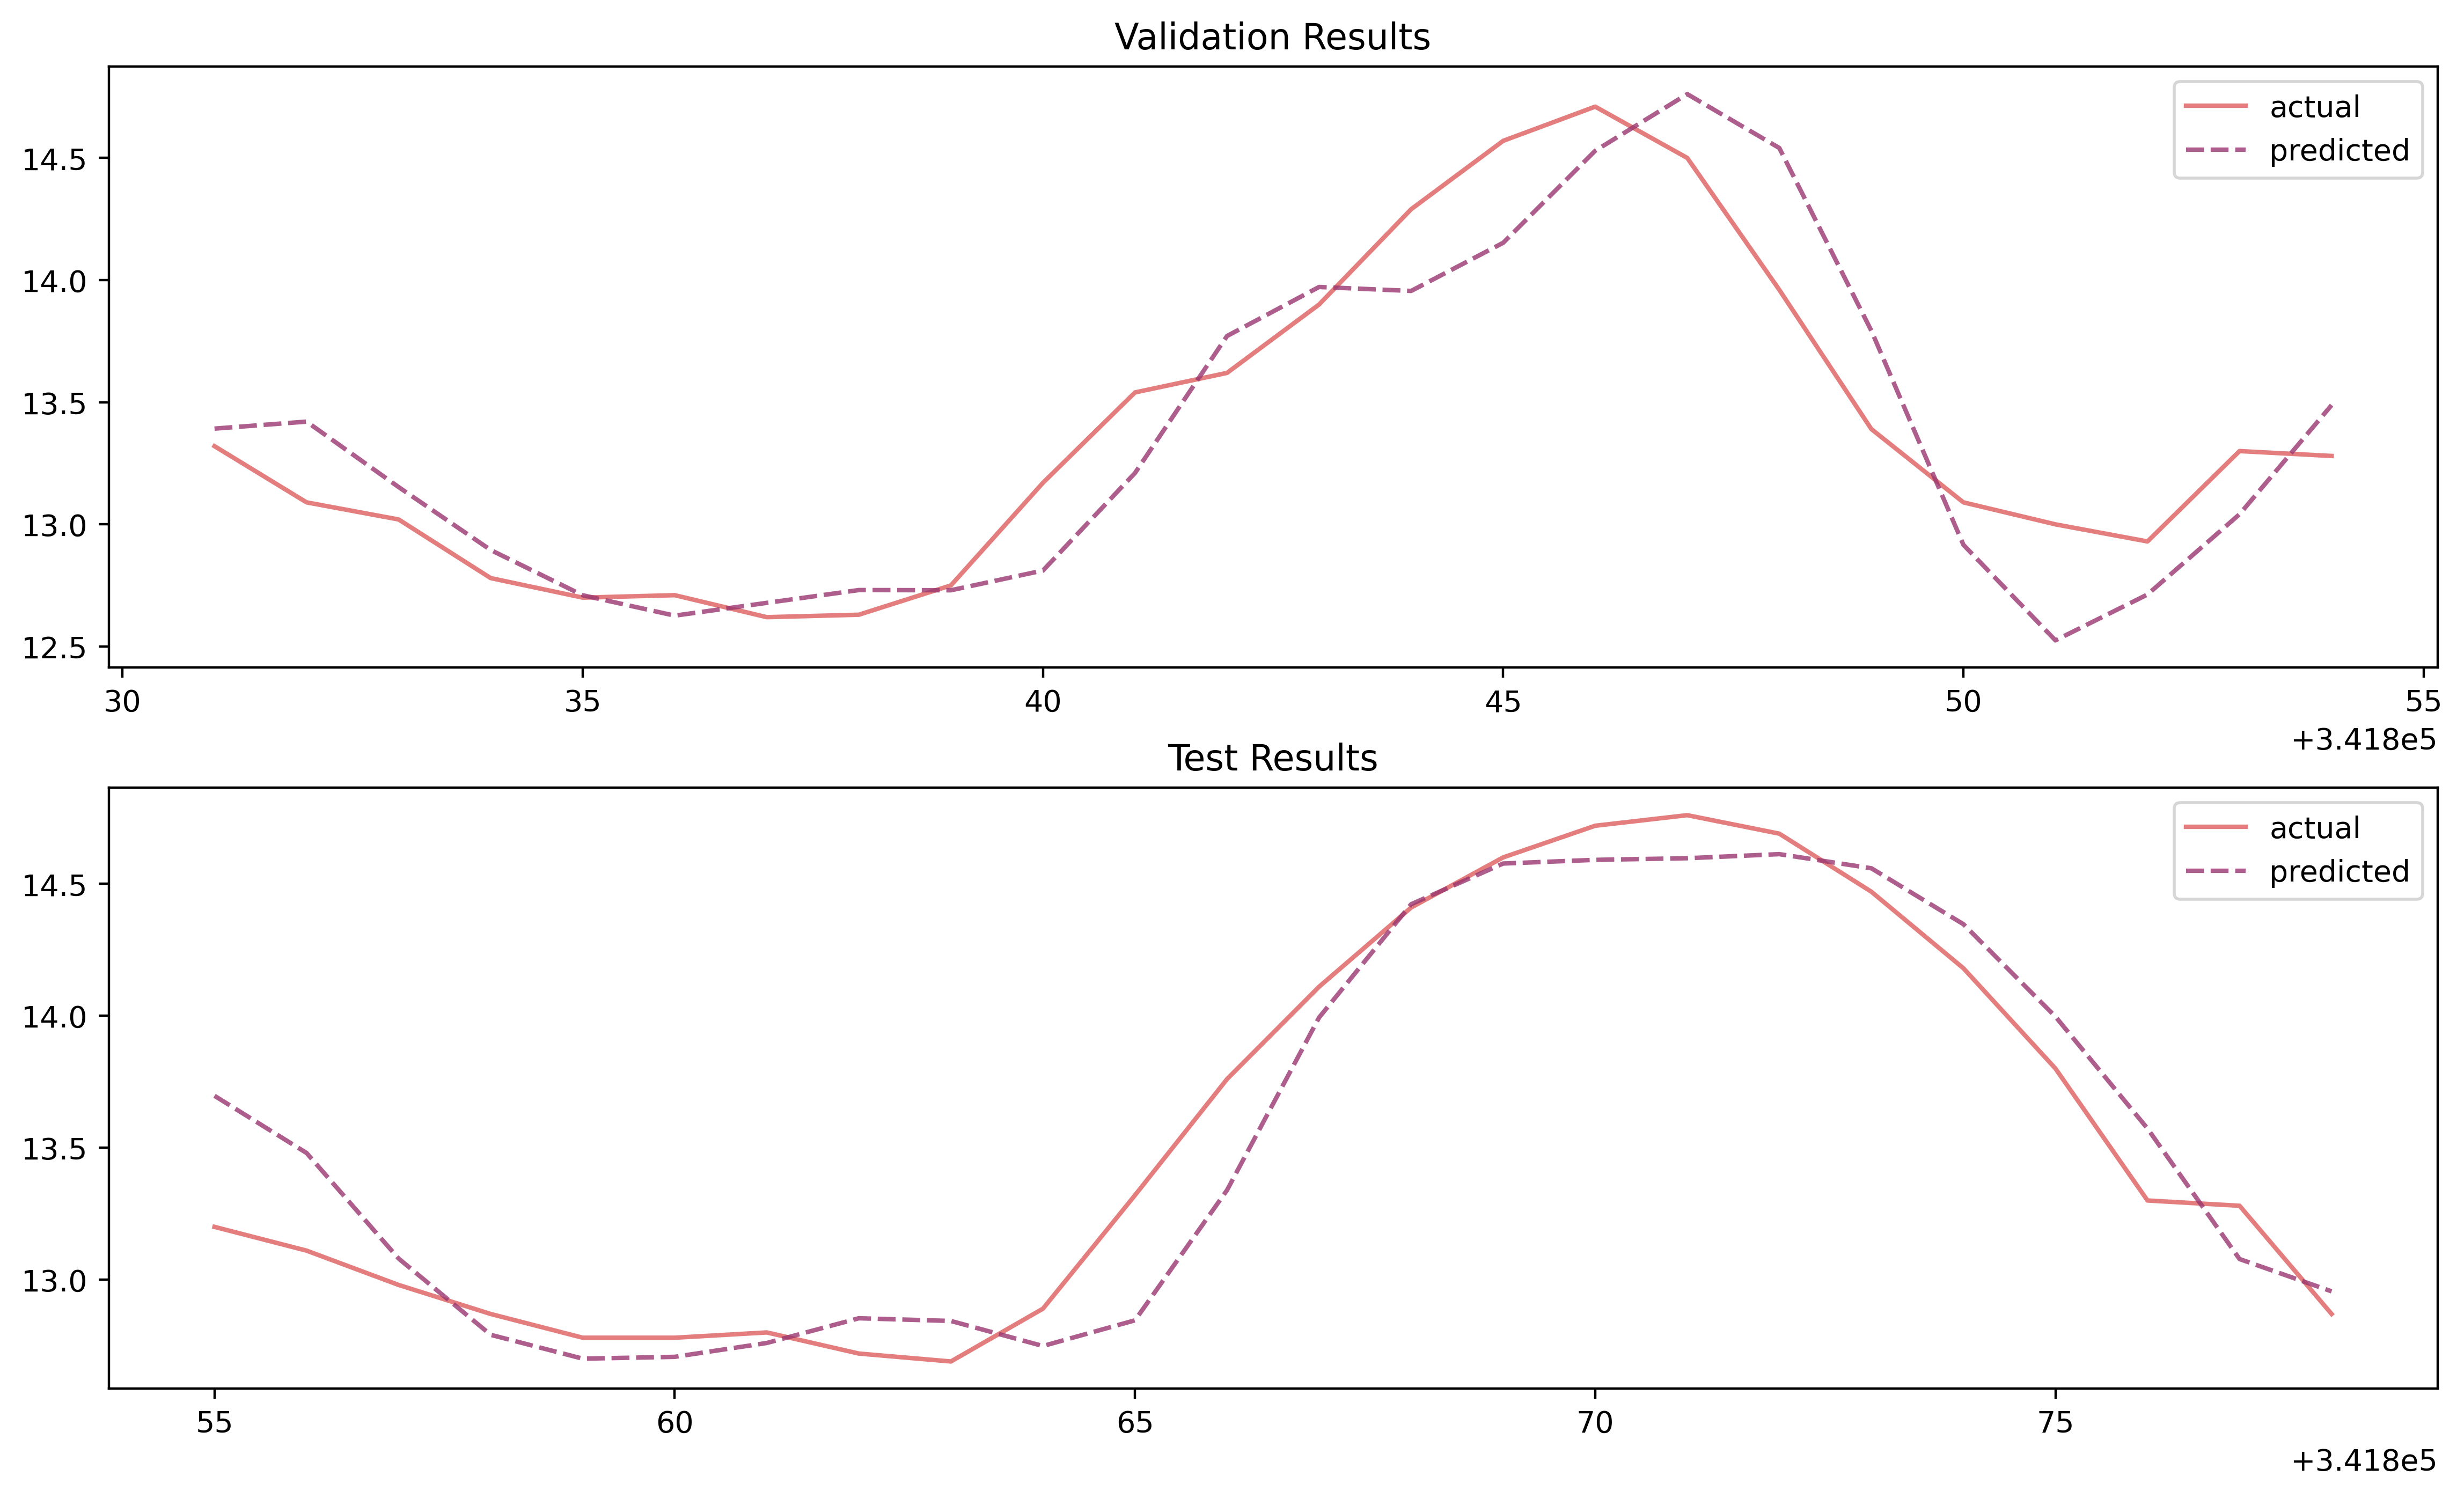

In [ ]:
pred = np.concatenate([train_pred,val_pred,test_pred])
df_pred = pd.DataFrame(df_filtered["temperature"].copy())
df_pred.columns=["actual"]
df_pred = df_pred[WINDOW:]
df_pred["predicted"] = pred

fig,axes = plt.subplots(2,1,figsize=(14,8),dpi=400)

plt.subplot(2,1,1)
plt.title("Validation Results")
sns.lineplot(df_pred[-48:-24],alpha=0.8,palette="flare",linestyle=None);

plt.subplot(2,1,2)
plt.title("Test Results")
sns.lineplot(df_pred[-24:],alpha=0.8,palette="flare",linestyle=None);

Mounted at /content/drive
Epoch 1/100
525/525 [==============================] - 13s 10ms/step - loss: 31.4163 - val_loss: 0.9602
Epoch 2/100
525/525 [==============================] - 5s 9ms/step - loss: 2.2446 - val_loss: 0.6994
Epoch 3/100
525/525 [==============================] - 4s 7ms/step - loss: 1.5595 - val_loss: 0.4571
Epoch 4/100
525/525 [==============================] - 4s 7ms/step - loss: 1.3992 - val_loss: 1.4809
Epoch 5/100
525/525 [==============================] - 5s 9ms/step - loss: 1.3271 - val_loss: 0.1165
Epoch 6/100
525/525 [==============================] - 4s 7ms/step - loss: 1.2758 - val_loss: 0.0913
Epoch 7/100
525/525 [==============================] - 4s 7ms/step - loss: 1.2425 - val_loss: 0.0578
Epoch 8/100
525/525 [==============================] - 5s 9ms/step - loss: 1.2202 - val_loss: 0.6101
Epoch 9/100
525/525 [==============================] - 4s 7ms/step - loss: 1.2396 - val_loss: 0.0704
Epoch 10/100
525/525 [==============================] - 4s 7ms

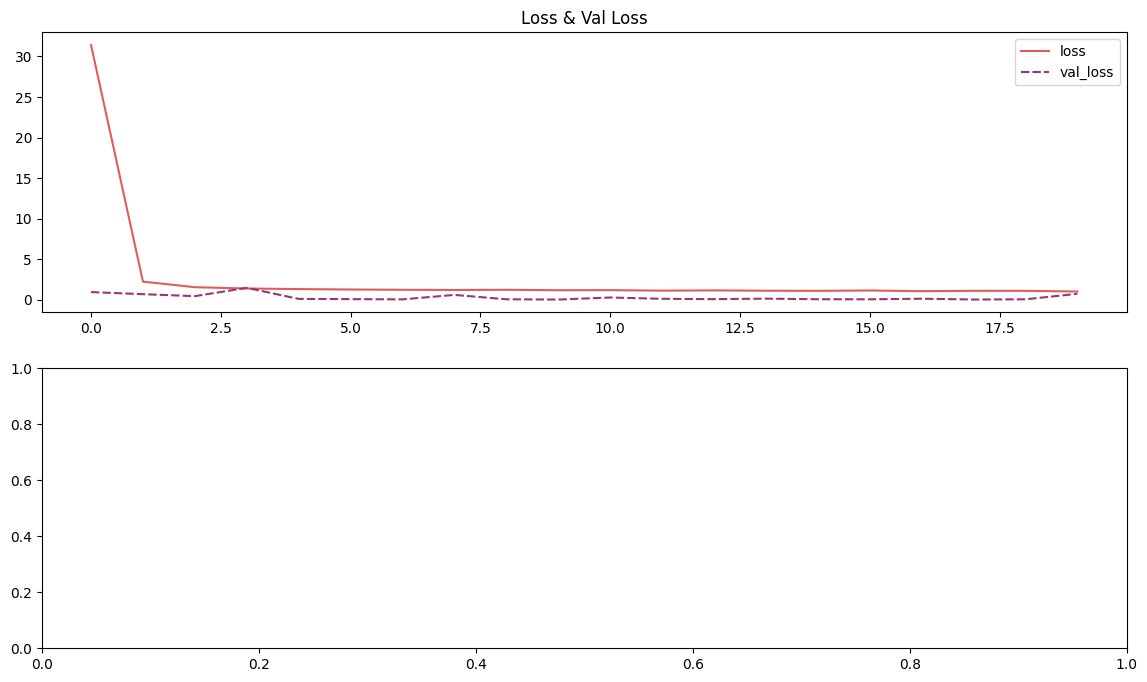

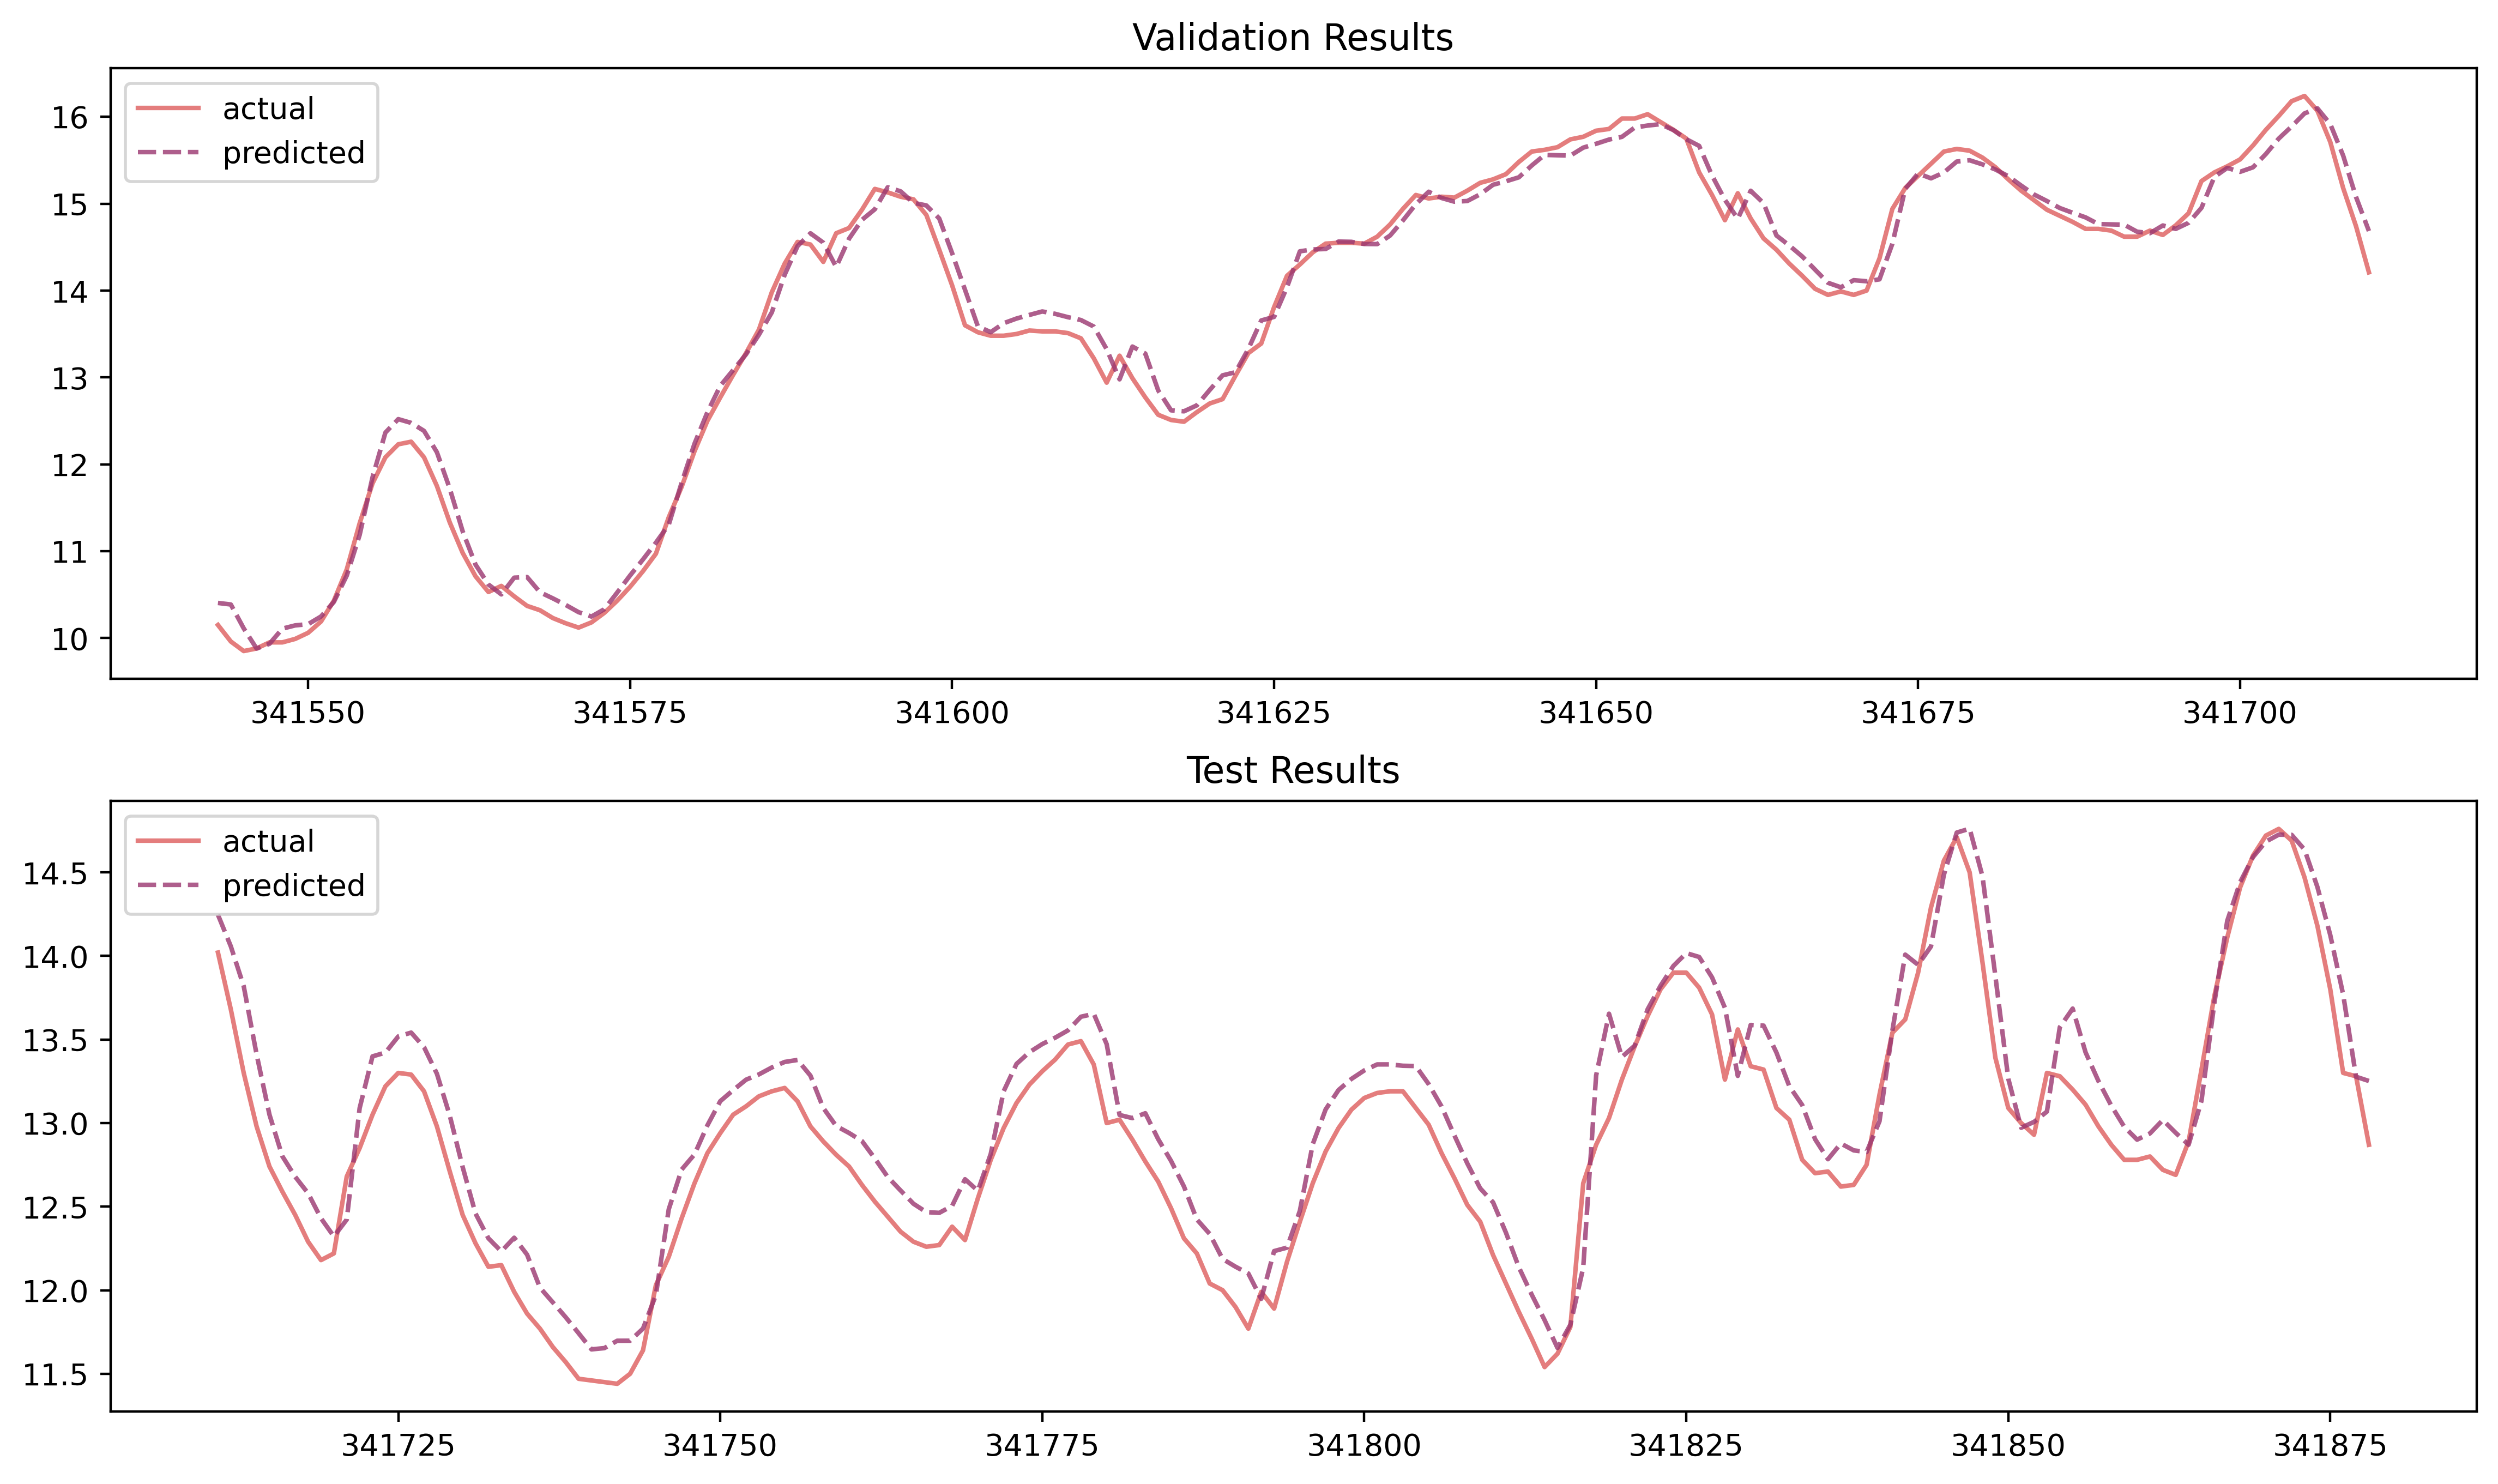

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler


drive.mount('/content/drive')

df_location = '/content/drive/MyDrive/Weather/41.9N_12.46E.csv'
df = pd.read_csv(df_location)
df.columns = ['year', 'month', 'day', 'hour', 'temperature', 'precipitation', 'u-wind', 'v-wind']
df.temperature = df.temperature -273.15

df['date'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
df['wind'] = (df['u-wind']**2 + df['v-wind']**2)**0.5
# Constants for transformations
hours_in_day = 24
days_in_month = 30  #approdf
months_in_year = 12

# Add cyclical hour features
df['hour_sin'] = np.sin(2 * np.pi * df['date'].dt.hour / hours_in_day)
df['hour_cos'] = np.cos(2 * np.pi * df['date'].dt.hour / hours_in_day)

# Add cyclical day features
df['day_sin'] = np.sin(2 * np.pi * df['date'].dt.day / days_in_month)
df['day_cos'] = np.cos(2 * np.pi * df['date'].dt.day / days_in_month)

# Add cyclical month features
df['month_sin'] = np.sin(2 * np.pi * df['date'].dt.month / months_in_year)
df['month_cos'] = np.cos(2 * np.pi * df['date'].dt.month / months_in_year)

columns_to_drop = ['year','month','day','hour']
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns], axis=1)
df.isnull().sum()

df_filtered = df.tail(52*7 * 24)
train_data = df_filtered.iloc[:-24]  # First 7 days
test_data = df_filtered.iloc[-24:]  # Last day

training_set = df_filtered['temperature'].values

def df_to_XY(df,window_size=10):
 X_train=[]
 y_train=[]

 for i in range(10,len(training_set)):
    X_train.append(training_set[i-10:i])
    y_train.append(training_set[i])

 X_train, y_train = np.array(X_train), np.array(y_train)
 return X_train, y_train

WINDOW = 10
X,y = df_to_XY(df_filtered,WINDOW)

X_train = X[:-24*7*2]
y_train = y[:-24*7*2]
X_val = X[-24*7*2:-24*7]
y_val = y[-24*7*2:-24*7]
X_test = X[-24*7:]
y_test = y[-24*7:]

regressor = Sequential()

# Adjusting LSTM layers
regressor.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=100, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=100))
regressor.add(Dropout(0.2))

# Output layer
regressor.add(Dense(units=1))

# Optimizer with adjustable learning rate
#optimizer = Adam(learning_rate=0.001)
optimizer = Adam(learning_rate=0.001)

regressor.compile(optimizer=optimizer, loss='mean_squared_error')

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Fit the model
history = regressor.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=16, callbacks=[early_stopping])

his = pd.DataFrame(history.history)
his.head()

his.columns
history_loss = his[['loss', 'val_loss']]

fig,axes = plt.subplots(2,1,figsize=(14,8))
plt.subplot(2,1,1)
plt.title("Loss & Val Loss")
sns.lineplot(history_loss,palette="flare");

train_pred = regressor.predict(X_train).flatten()
val_pred = regressor.predict(X_val).flatten()
test_pred = regressor.predict(X_test).flatten()

pred = np.concatenate([train_pred,val_pred,test_pred])
df_pred = pd.DataFrame(df_filtered["temperature"].copy())
df_pred.columns=["actual"]
df_pred = df_pred[WINDOW:]
df_pred["predicted"] = pred

fig,axes = plt.subplots(2,1,figsize=(14,8),dpi=400)

plt.subplot(2,1,1)
plt.title("Validation Results")
sns.lineplot(df_pred[-24*7*2:-24*7],alpha=0.8,palette="flare",linestyle=None);

plt.subplot(2,1,2)
plt.title("Test Results")
sns.lineplot(df_pred[-24*7:],alpha=0.8,palette="flare",linestyle=None);
















In [ ]:
!pip install keras-tuner

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from keras_tuner import BayesianOptimization
from sklearn.preprocessing import MinMaxScaler
from google.colab import drive

drive.mount('/content/drive')

df_location = '/content/drive/MyDrive/Weather/41.9N_12.46E.csv'
df = pd.read_csv(df_location)
df.columns = ['year', 'month', 'day', 'hour', 'temperature', 'precipitation', 'u-wind', 'v-wind']
df.temperature = df.temperature - 273.15

df['date'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
df.set_index('date', inplace=True)

df['wind'] = (df['u-wind']**2 + df['v-wind']**2)**0.5
hours_in_day = 24
days_in_month = 30
months_in_year = 12

df['hour_sin'] = np.sin(2 * np.pi * df.index.hour / hours_in_day)
df['hour_cos'] = np.cos(2 * np.pi * df.index.hour / hours_in_day)
df['day_sin'] = np.sin(2 * np.pi * df.index.day / days_in_month)
df['day_cos'] = np.cos(2 * np.pi * df.index.day / days_in_month)
df['month_sin'] = np.sin(2 * np.pi * df.index.month / months_in_year)
df['month_cos'] = np.cos(2 * np.pi * df.index.month / months_in_year)

columns_to_drop = ['year', 'month', 'day', 'hour', 'u-wind', 'v-wind']
df.drop(columns=columns_to_drop, inplace=True)

df_filtered = df.tail(52 * 7 * 24)  # Last 52 weeks (one year)
train_data = df_filtered.iloc[:-24]  # First 7 days minus last day
test_data = df_filtered.iloc[-24:]  # Last day

training_set = df_filtered['temperature'].values

def df_to_XY(df, window_size=10):
    X_train = []
    y_train = []

    for i in range(window_size, len(df)):
        X_train.append(training_set[i-window_size:i])
        y_train.append(training_set[i])

    X_train, y_train = np.array(X_train), np.array(y_train)
    return X_train, y_train

WINDOW = 10
X, y = df_to_XY(df_filtered, WINDOW)

X_train = X[:-24*7*2]
y_train = y[:-24*7*2]
X_val = X[-24*7*2:-24*7]
y_val = y[-24*7*2:-24*7]
X_test = X[-24*7:]
y_test = y[-24*7:]

def build_model(hp):
    model = Sequential()
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(LSTM(units=hp.Int('units_' + str(i), min_value=50, max_value=200, step=50),
                       return_sequences=True if i < hp.get('num_layers') - 1 else False,
                       input_shape=(X_train.shape[1], 1)))
        model.add(Dropout(hp.Float('dropout_' + str(i), min_value=0.0, max_value=0.5, step=0.1)))
    model.add(Dense(units=1))
    model.compile(optimizer=Adam(hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')),
                  loss='mean_squared_error')
    return model

tuner = BayesianOptimization(build_model,
                             objective='val_loss',
                             max_trials=10,
                             directory='my_dir',
                             project_name='weather_forecasting')

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

tuner.search(X_train, y_train, epochs=100, validation_data=(X_val, y_val), callbacks=[early_stopping])

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Visualization and evaluation code goes here...


Trial 10 Complete [00h 00m 37s]
val_loss: 0.021366199478507042

Best val_loss So Far: 0.02005935087800026
Total elapsed time: 00h 09m 48s
Epoch 1/100
263/263 [==============================] - 3s 5ms/step - loss: 19.3788 - val_loss: 0.2063
Epoch 2/100
263/263 [==============================] - 1s 4ms/step - loss: 0.2494 - val_loss: 0.1258
Epoch 3/100
263/263 [==============================] - 1s 4ms/step - loss: 0.1300 - val_loss: 0.0666
Epoch 4/100
263/263 [==============================] - 1s 4ms/step - loss: 0.0931 - val_loss: 0.0321
Epoch 5/100
263/263 [==============================] - 1s 4ms/step - loss: 0.0791 - val_loss: 0.0414
Epoch 6/100
263/263 [==============================] - 1s 4ms/step - loss: 0.0713 - val_loss: 0.0791
Epoch 7/100
263/263 [==============================] - 1s 4ms/step - loss: 0.0656 - val_loss: 0.0243
Epoch 8/100
263/263 [==============================] - 1s 4ms/step - loss: 0.0569 - val_loss: 0.0268
Epoch 9/100
263/263 [==============================] 

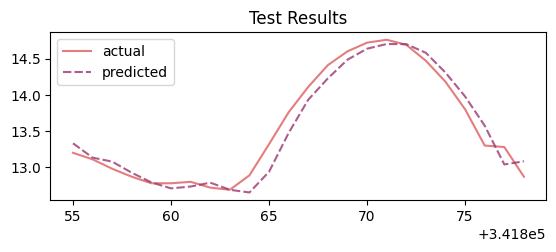

In [ ]:
plt.subplot(2,1,2)
plt.title("Test Results")
sns.lineplot(df_pred[-24:],alpha=0.8,palette="flare",linestyle=None);

In [ ]:
df_pred

,actual,predicted
333153,12.50,13.170853
333154,12.75,12.358650
333155,13.13,12.620038
333156,13.65,13.301229
333157,13.93,13.792896
...,...,...
341874,14.18,14.306582
341875,13.80,13.977027
341876,13.30,13.574224
341877,13.28,13.039536


In [ ]:
test_pred

array([13.92724  , 13.741588 , 13.450481 , 13.028052 , 12.748326 ,
       12.558073 , 12.45672  , 12.356024 , 12.20794  , 12.118482 ,
       12.221757 , 12.848682 , 13.016432 , 13.107073 , 13.303163 ,
       13.333278 , 13.263846 , 13.118575 , 12.863356 , 12.565322 ,
       12.303119 , 12.159064 , 12.053096 , 12.11528  , 11.961918 ,
       11.792945 , 11.737711 , 11.627132 , 11.528604 , 11.431391 ,
       11.439213 , 11.458441 , 11.441894 , 11.518982 , 11.701429 ,
       12.184846 , 12.3422785, 12.489893 , 12.7249975, 12.871999 ,
       12.956261 , 13.044915 , 13.080685 , 13.134852 , 13.168191 ,
       13.178007 , 13.077639 , 12.891834 , 12.810151 , 12.750883 ,
       12.680335 , 12.569161 , 12.468027 , 12.391401 , 12.305246 ,
       12.253267 , 12.240548 , 12.268578 , 12.416736 , 12.309529 ,
       12.592102 , 12.914525 , 13.045686 , 13.172157 , 13.260593 ,
       13.316819 , 13.373372 , 13.458715 , 13.463486 , 13.271299 ,
       12.853668 , 12.920541 , 12.859447 , 12.661653 , 12.5727

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 1/100
543/543 [==============================] - 11s 9ms/step - loss: 12.9059 - val_loss: 0.3957
Epoch 2/100
543/543 [==============================] - 4s 7ms/step - loss: 1.8846 - val_loss: 0.4626
Epoch 3/100
543/543 [==============================] - 5s 9ms/step - loss: 1.5725 - val_loss: 0.2370
Epoch 4/100
543/543 [==============================] - 4s 7ms/step - loss: 1.4472 - val_loss: 0.2122
Epoch 5/100
543/543 [==============================] - 4s 7ms/step - loss: 1.3839 - val_loss: 0.1943
Epoch 6/100
543/543 [==============================] - 5s 9ms/step - loss: 1.4566 - val_loss: 0.2019
Epoch 7/100
543/543 [==============================] - 4s 8ms/step - loss: 1.2740 - val_loss: 0.1825
Epoch 8/100
543/543 [==============================] - 4s 8ms/step - loss: 1.3115 - val_loss: 0.1896
Epoch 9/100
543/543 [==============================] - 5s 9ms

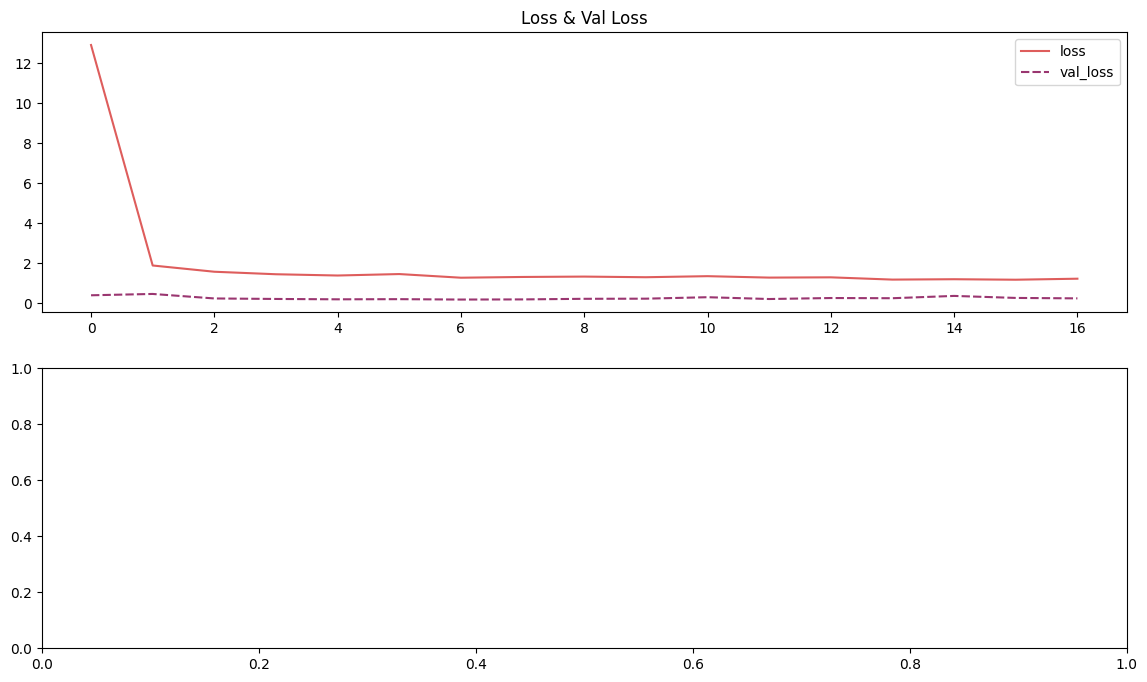

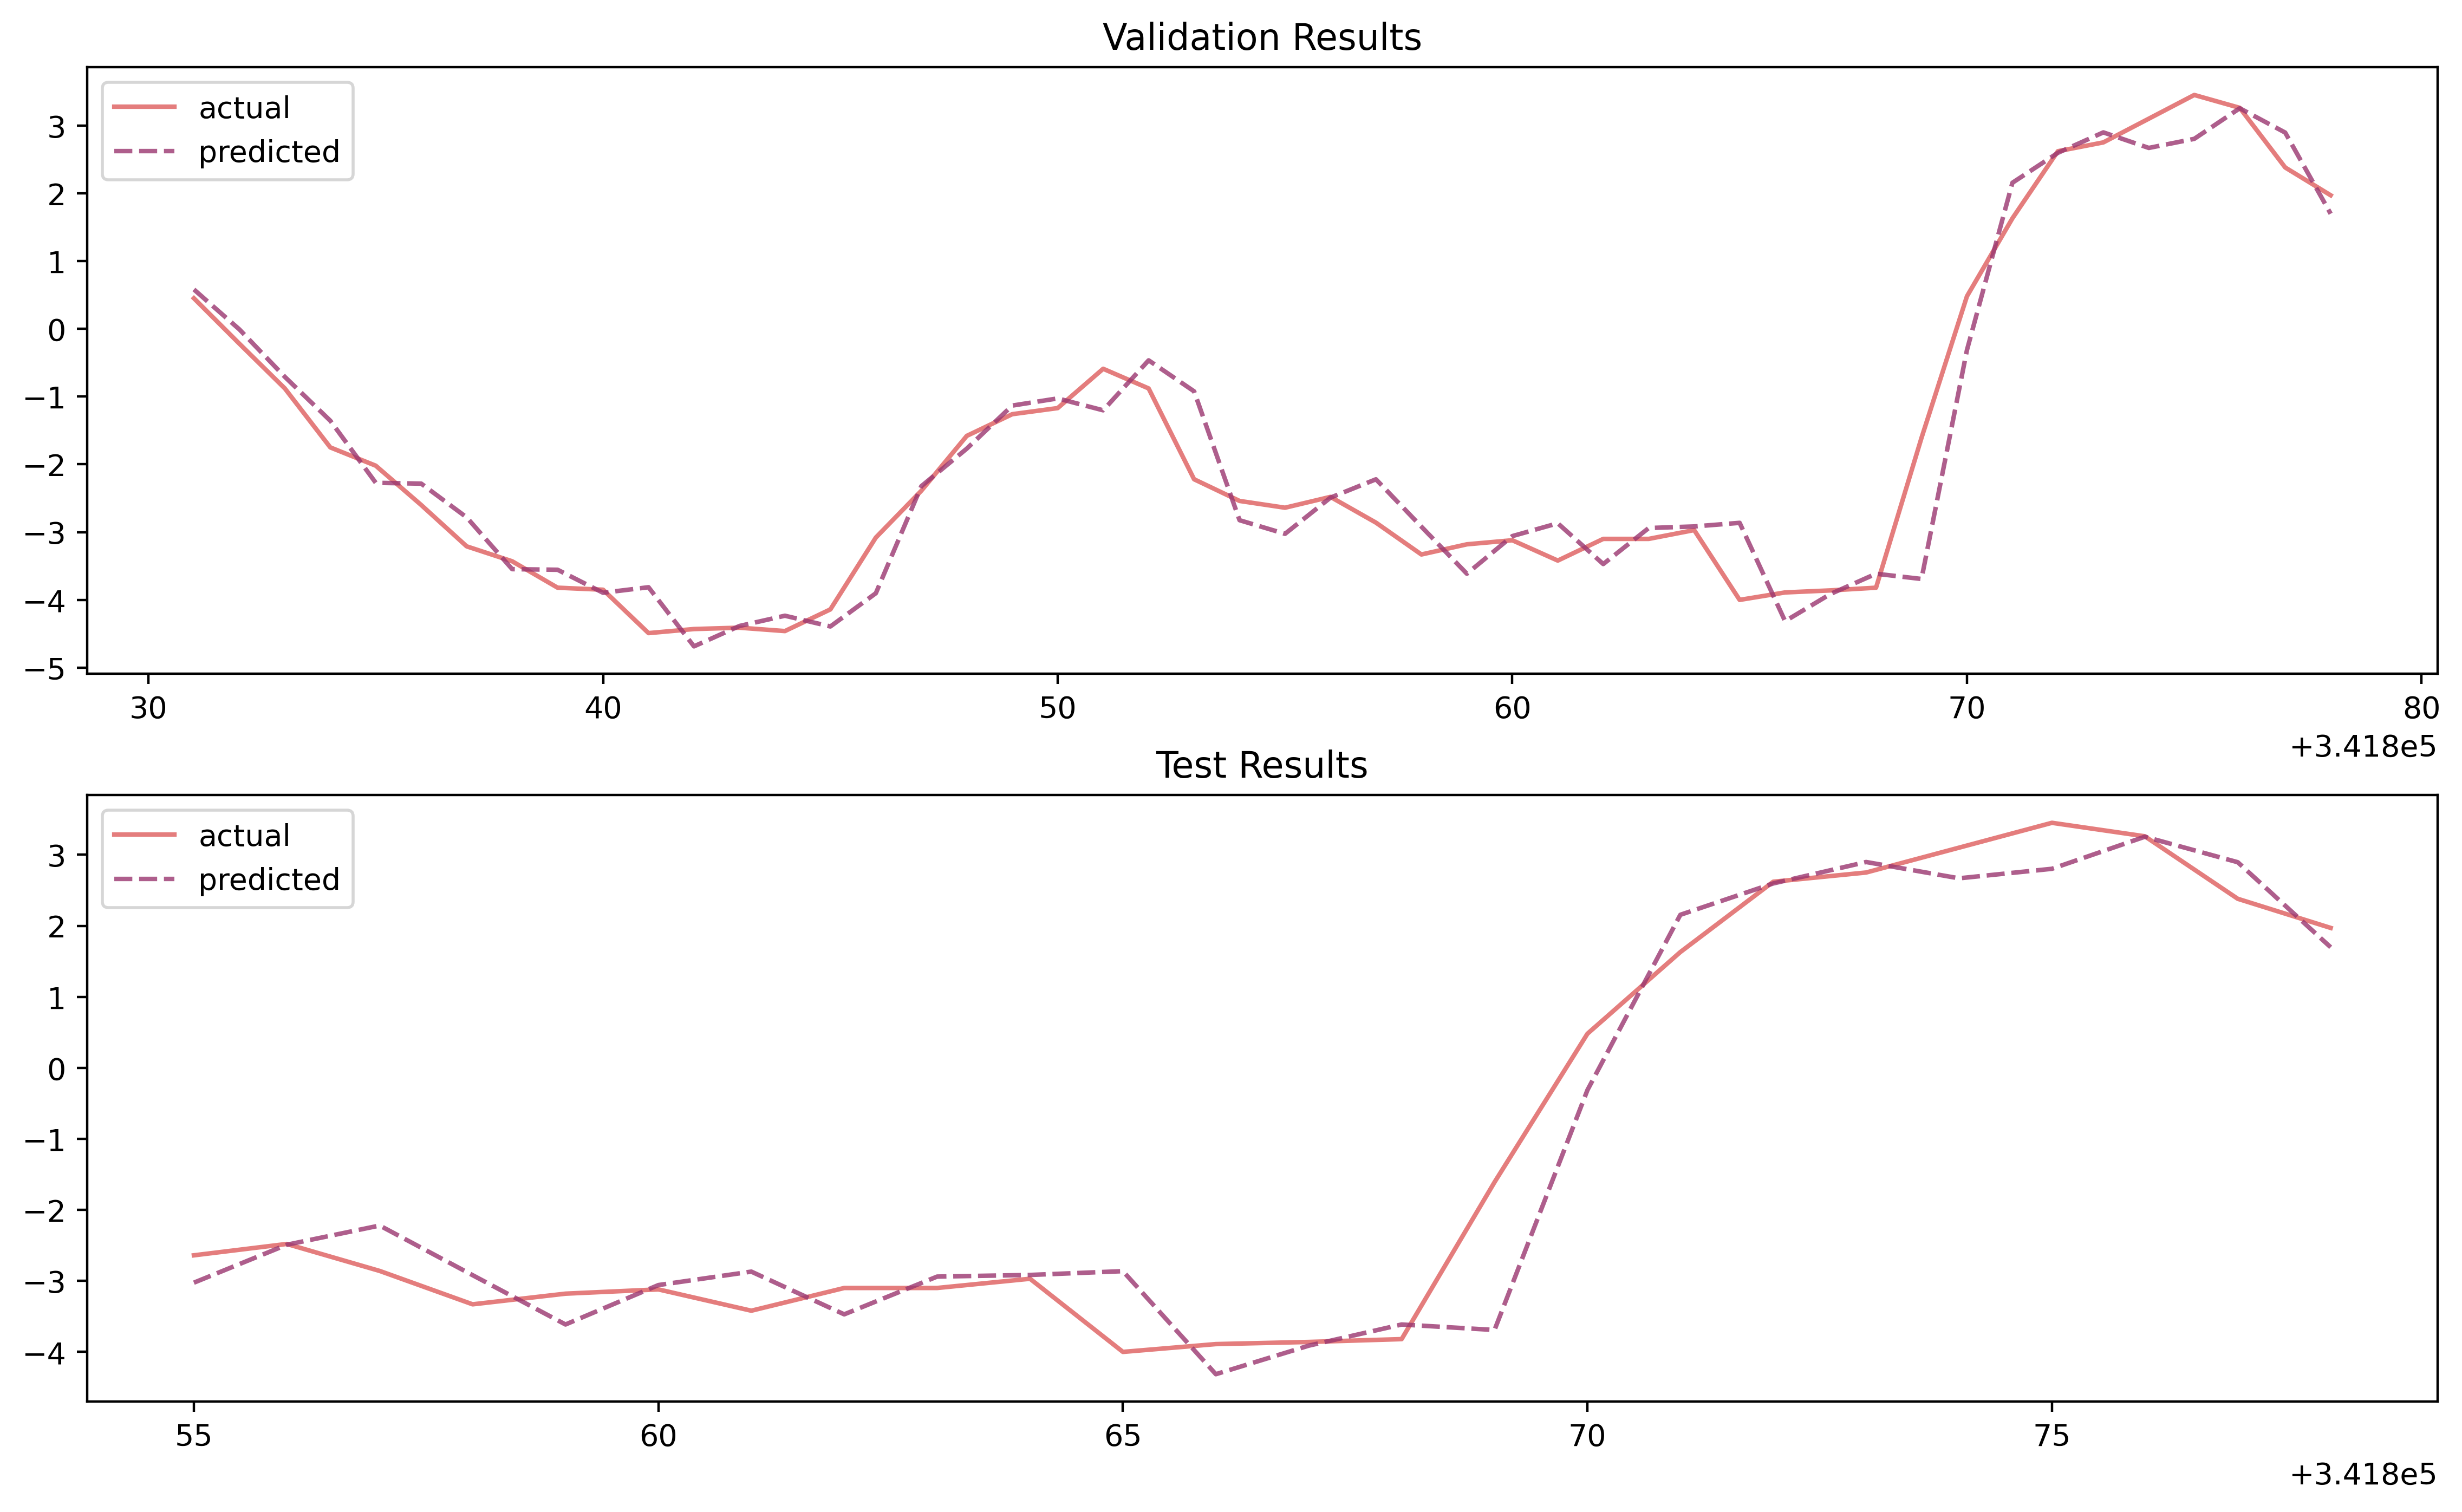

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler


drive.mount('/content/drive')

df_location = '/content/drive/MyDrive/Weather/40.75N_286.01E.csv'
df = pd.read_csv(df_location)
df.columns = ['year', 'month', 'day', 'hour', 'temperature', 'precipitation', 'u-wind', 'v-wind']
df.temperature = df.temperature -273.15

df['date'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
df['wind'] = (df['u-wind']**2 + df['v-wind']**2)**0.5
# Constants for transformations
hours_in_day = 24
days_in_month = 30  #approdf
months_in_year = 12

# Add cyclical hour features
df['hour_sin'] = np.sin(2 * np.pi * df['date'].dt.hour / hours_in_day)
df['hour_cos'] = np.cos(2 * np.pi * df['date'].dt.hour / hours_in_day)

# Add cyclical day features
df['day_sin'] = np.sin(2 * np.pi * df['date'].dt.day / days_in_month)
df['day_cos'] = np.cos(2 * np.pi * df['date'].dt.day / days_in_month)

# Add cyclical month features
df['month_sin'] = np.sin(2 * np.pi * df['date'].dt.month / months_in_year)
df['month_cos'] = np.cos(2 * np.pi * df['date'].dt.month / months_in_year)

columns_to_drop = ['year','month','day','hour']
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns], axis=1)


df.isnull().sum()

df_filtered = df.tail(52*7 * 24)
train_data = df_filtered.iloc[:-24]  # First 7 days
test_data = df_filtered.iloc[-24:]  # Last day

training_set = df_filtered['temperature'].values


def df_to_XY(df,window_size=10):
 X_train=[]
 y_train=[]

 for i in range(10,len(training_set)):
    X_train.append(training_set[i-10:i])
    y_train.append(training_set[i])

 X_train, y_train = np.array(X_train), np.array(y_train)
 return X_train, y_train


WINDOW = 10
X,y = df_to_XY(df_filtered,WINDOW)


X_train = X[:-48]
y_train = y[:-48]
X_val = X[-48:-24]
y_val = y[-48:-24]
X_test = X[-24:]
y_test = y[-24:]

regressor = Sequential()

# Adjusting LSTM layers
regressor.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=100, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=100))
regressor.add(Dropout(0.2))

# Output layer
regressor.add(Dense(units=1))

# Optimizer with adjustable learning rate
optimizer = Adam(learning_rate=0.001)

regressor.compile(optimizer=optimizer, loss='mean_squared_error')

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Fit the model
history = regressor.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=16, callbacks=[early_stopping])

his = pd.DataFrame(history.history)
his.head()

his.columns
history_loss = his[['loss', 'val_loss']]

fig,axes = plt.subplots(2,1,figsize=(14,8))
plt.subplot(2,1,1)
plt.title("Loss & Val Loss")
sns.lineplot(history_loss,palette="flare");

train_pred = regressor.predict(X_train).flatten()
val_pred = regressor.predict(X_val).flatten()
test_pred = regressor.predict(X_test).flatten()

pred = np.concatenate([train_pred,val_pred,test_pred])
df_pred = pd.DataFrame(df_filtered["temperature"].copy())
df_pred.columns=["actual"]
df_pred = df_pred[WINDOW:]
df_pred["predicted"] = pred

fig,axes = plt.subplots(2,1,figsize=(14,8),dpi=400)

plt.subplot(2,1,1)
plt.title("Validation Results")
sns.lineplot(df_pred[-48:],alpha=0.8,palette="flare",linestyle=None);

plt.subplot(2,1,2)
plt.title("Test Results")
sns.lineplot(df_pred[-24:],alpha=0.8,palette="flare",linestyle=None);



# Metrics
mae = mean_absolute_error(y_test, test_pred)
mse = mean_squared_error(y_test, test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, test_pred)





In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def train_and_evaluate_rnn(window_size):
    X, y = df_to_XY(df_filtered, window_size)

    # Train-test split
    X_train = X[:-48]
    y_train = y[:-48]
    X_val = X[-48:-24]
    y_val = y[-48:-24]
    X_test = X[-24:]
    y_test = y[-24:]

    # RNN model definition
    regressor = Sequential()
    regressor.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    regressor.add(Dropout(0.2))
    regressor.add(LSTM(units=100, return_sequences=True))
    regressor.add(Dropout(0.2))
    regressor.add(LSTM(units=100))
    regressor.add(Dropout(0.2))
    regressor.add(Dense(units=1))

    optimizer = Adam(learning_rate=0.001)
    regressor.compile(optimizer=optimizer, loss='mean_squared_error')

    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    regressor.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=16, callbacks=[early_stopping])

    # Predictions
    y_pred_test = regressor.predict(X_test).flatten()

    # Metrics
    mae = mean_absolute_error(y_test, y_pred_test)
    mse = mean_squared_error(y_test, y_pred_test)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred_test)

    return mae, mse, rmse, r2

# Loop over different window sizes
window_sizes = [1,2,3,5,10,15,20,25,30]  # Example window sizes
results = []

for window in window_sizes:
    mae, mse, rmse, r2 = train_and_evaluate_rnn(window)
    results.append({'Window Size': window, 'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2 Score': r2})

# Convert results to a DataFrame for easier viewing
results_df = pd.DataFrame(results)
print(results_df)


NameError: name 'df_to_XY' is not defined

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


drive.mount('/content/drive')

df_location = '/content/drive/MyDrive/Weather/41.9N_12.46E.csv'
df = pd.read_csv(df_location)
df.columns = ['year', 'month', 'day', 'hour', 'temperature', 'precipitation', 'u-wind', 'v-wind']
df.temperature = df.temperature -273.15

df['date'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
df['wind'] = (df['u-wind']**2 + df['v-wind']**2)**0.5
# Constants for transformations
hours_in_day = 24
days_in_month = 30  #approdf
months_in_year = 12

# Add cyclical hour features
df['hour_sin'] = np.sin(2 * np.pi * df['date'].dt.hour / hours_in_day)
df['hour_cos'] = np.cos(2 * np.pi * df['date'].dt.hour / hours_in_day)

# Add cyclical day features
df['day_sin'] = np.sin(2 * np.pi * df['date'].dt.day / days_in_month)
df['day_cos'] = np.cos(2 * np.pi * df['date'].dt.day / days_in_month)

# Add cyclical month features
df['month_sin'] = np.sin(2 * np.pi * df['date'].dt.month / months_in_year)
df['month_cos'] = np.cos(2 * np.pi * df['date'].dt.month / months_in_year)

columns_to_drop = ['year','month','day','hour']
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns], axis=1)

df.isnull().sum()

df_filtered = df.tail(4*7 * 24)
train_data = df_filtered.iloc[:-24]  # First 7 days
test_data = df_filtered.iloc[-24:]  # Last day

training_set = df_filtered['temperature'].values

def df_to_XY(df,window_size=10):
 X_train=[]
 y_train=[]

 for i in range(10,len(training_set)):
    X_train.append(training_set[i-10:i])
    y_train.append(training_set[i])

 X_train, y_train = np.array(X_train), np.array(y_train)
 return X_train, y_train




WINDOW = 10
X,y = df_to_XY(df_filtered,WINDOW)

X_train = X[:-48]
y_train = y[:-48]
X_val = X[-48:-24]
y_val = y[-48:-24]
X_test = X[-24:]
y_test = y[-24:]

regressor = Sequential()

# Adjusting LSTM layers
regressor.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=100, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=100))
regressor.add(Dropout(0.2))

# Output layer
regressor.add(Dense(units=1))

# Optimizer with adjustable learning rate
optimizer = Adam(learning_rate=0.001)

regressor.compile(optimizer=optimizer, loss='mean_squared_error')

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Fit the model
history = regressor.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=16, callbacks=[early_stopping])

his = pd.DataFrame(history.history)
his.head()

his.columns
history_loss = his[['loss', 'val_loss']]

fig,axes = plt.subplots(2,1,figsize=(14,8))
plt.subplot(2,1,1)
plt.title("Loss & Val Loss")
sns.lineplot(history_loss,palette="flare");

train_pred = regressor.predict(X_train).flatten()
val_pred = regressor.predict(X_val).flatten()
test_pred = regressor.predict(X_test).flatten()

pred = np.concatenate([train_pred,val_pred,test_pred])
df_pred = pd.DataFrame(df_filtered["temperature"].copy())
df_pred.columns=["actual"]
df_pred = df_pred[WINDOW:]
df_pred["predicted"] = pred

fig,axes = plt.subplots(2,1,figsize=(14,8),dpi=400)

plt.subplot(2,1,1)
plt.title("Validation Results")
sns.lineplot(df_pred[-48:],alpha=0.8,palette="flare",linestyle=None);

plt.subplot(2,1,2)
plt.title("Test Results")
sns.lineplot(df_pred[-24:],alpha=0.8,palette="flare",linestyle=None);



df_pred

print(mean_absolute_error(y_test, y_pred_xg))
print(mean_squared_error(y_test, y_pred_xg))
print(np.sqrt(mean_squared_error(y_test, y_pred_xg)))
np.mean(abs_percentage_errors),
'R2': r2_xg













SyntaxError: illegal target for annotation (<ipython-input-2-d0584d1f8b81>, line 139)

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def train_and_evaluate_rnn(batch_size):
    WINDOW_SIZE = 10  # Set your window size
    X, y = df_to_XY(df_filtered, WINDOW_SIZE)

    # Train-test split
    X_train = X[:-48]
    y_train = y[:-48]
    X_val = X[-48:-24]
    y_val = y[-48:-24]
    X_test = X[-24:]
    y_test = y[-24:]

    # RNN model definition
    regressor = Sequential()
    regressor.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    regressor.add(Dropout(0.2))
    regressor.add(LSTM(units=100, return_sequences=True))
    regressor.add(Dropout(0.2))
    regressor.add(LSTM(units=100))
    regressor.add(Dropout(0.2))
    regressor.add(Dense(units=1))

    optimizer = Adam(learning_rate=0.001)
    regressor.compile(optimizer=optimizer, loss='mean_squared_error')

    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    regressor.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=batch_size, callbacks=[early_stopping])

    # Predictions
    y_pred_test = regressor.predict(X_test).flatten()

    # Metrics
    mae = mean_absolute_error(y_test, y_pred_test)
    mse = mean_squared_error(y_test, y_pred_test)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred_test)

    return mae, mse, rmse, r2

# Loop over different batch sizes
batch_sizes = [16, 32, 64, 128]  # Example batch sizes
results = []

for batch in batch_sizes:
    mae, mse, rmse, r2 = train_and_evaluate_rnn(batch)
    results.append({'Batch Size': batch, 'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2 Score': r2})

# Convert results to a DataFrame for easier viewing
results_df = pd.DataFrame(results)
print(results_df)


Epoch 1/100
543/543 [==============================] - 11s 9ms/step - loss: 28.4136 - val_loss: 0.7355
Epoch 2/100
543/543 [==============================] - 4s 7ms/step - loss: 1.8675 - val_loss: 0.2112
Epoch 3/100
543/543 [==============================] - 5s 9ms/step - loss: 1.4656 - val_loss: 0.1312
Epoch 4/100
543/543 [==============================] - 4s 7ms/step - loss: 1.3135 - val_loss: 0.0866
Epoch 5/100
543/543 [==============================] - 4s 7ms/step - loss: 1.3022 - val_loss: 0.1831
Epoch 6/100
543/543 [==============================] - 5s 9ms/step - loss: 1.2419 - val_loss: 0.1450
Epoch 7/100
543/543 [==============================] - 4s 7ms/step - loss: 1.2458 - val_loss: 0.2732
Epoch 8/100
543/543 [==============================] - 4s 7ms/step - loss: 1.2334 - val_loss: 0.0608
Epoch 9/100
543/543 [==============================] - 5s 9ms/step - loss: 1.1939 - val_loss: 0.8553
Epoch 10/100
543/543 [==============================] - 4s 8ms/step - loss: 1.1768 - val_

1/1 [==============================] - 1s 886ms/step
   Batch Size       MAE       MSE      RMSE  R2 Score
0          16  0.104203  0.019600  0.139999  0.963828
1          32  0.128449  0.025325  0.159137  0.953262
2          64  0.166227  0.042589  0.206371  0.921400
3         128  0.158166  0.037121  0.192668  0.931491
